Below is some code to simulate many games as described in the problem sheet to calculate to experimental probability of landing on 25

In [40]:
import numpy as np
import matplotlib.pyplot as plt


def simu(options,N,K,M):  #returns the number of times K is achieved from a game of M throws on the numbers in options
    #options = all the possible numbers which can be picked/thrown by the coin(is a list so can include the case of a dice roll rather than than a coin)
    #N = number of trials
    #K = number to we're trying to hit
    #M = number of throws in each game
    coins = np.array(options)
    total = 0
    for i in range(N):
        moves = 0
        step = 1
        while (step<K and moves<M):
            step += np.random.choice(coins)
            moves +=1
            if step == K:
                total += 1
            
    return total

n = 100000
a = simu([1,2],n,25,24)
print(a)
print(a/n)

    

66748
0.66748


Below is just some calculations for the theoretical probability of hitting 25 in a game

In [31]:
import scipy.special as spec

running_total = 0
for i in range(13):
    running_total += spec.comb(24-i,i, exact = True) * 2**i
print(running_total)
print(2**24)
print(running_total / 2**24)

11184811
16777216
0.6666666865348816


The following is plotting a graph for different numbers of moves but the same coin which has 1 and 2 equally likely

In [44]:
noMoves = np.linspace(1,50,50,endpoint=True)
probs = np.zeros_like(noMoves)
noSims = 50000
for i in range(probs.size):
    probs[i] = simu([1,2],noSims,noMoves[i]+1,noMoves[i]) / noSims


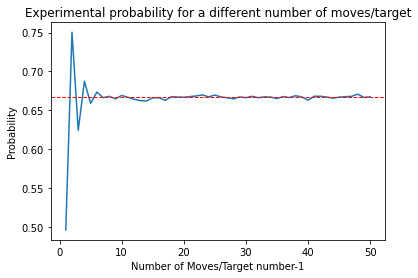

In [54]:
plt.plot(noMoves,probs)
plt.xlabel("Number of Moves/Target number-1")
plt.ylabel("Probability")
plt.title("Experimental probability for a different number of moves/target")
plt.axhline(y=2/3,color="r",linestyle="--",linewidth=1)
plt.savefig("Different Numbers of Moves.png")
plt.show()


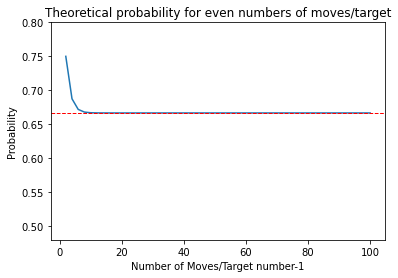

In [69]:
theoretical_moves = np.linspace(2,100,50,endpoint=True)
theoretical_probabilities = np.zeros_like(theoretical_moves)
for i in range(1,51):
    r_total = 0
    for j in range(i+1):
        r_total += spec.comb(2*i-j,j,exact = True) * 2**j
        theoretical_probabilities[i-1] = r_total / 2**(i*2)

        
plt.plot(theoretical_moves,theoretical_probabilities)
plt.xlabel("Number of Moves/Target number-1")
plt.ylabel("Probability")
plt.title("Theoretical probability for even numbers of moves/target")
plt.axhline(y=2/3,color="r",linestyle="--",linewidth=1)
ax = plt.gca()
ax.set_ylim([0.48, 0.8])
plt.savefig("Theoretical Probabilities Graph.png")
plt.show()
